In [36]:
'''
Uisng LSTM to predict stock price based on last 60 days' trends
'''
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [37]:
#Get the stock quote using pandas_data_reader package
df = web.DataReader('AAPL', data_source='yahoo', start='2013-01-01', end='2021-01-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,19.121429,18.178572,18.233213,19.006071,659492400.0,16.516520
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.039789
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.824715
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.356062
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.259851
...,...,...,...,...,...,...
2021-01-25,145.089996,136.539993,143.070007,142.919998,157611700.0,142.706757
2021-01-26,144.300003,141.369995,143.600006,143.160004,98390600.0,142.946396
2021-01-27,144.300003,140.410004,143.429993,142.059998,140843800.0,141.848038


In [38]:
df.shape

(2035, 6)

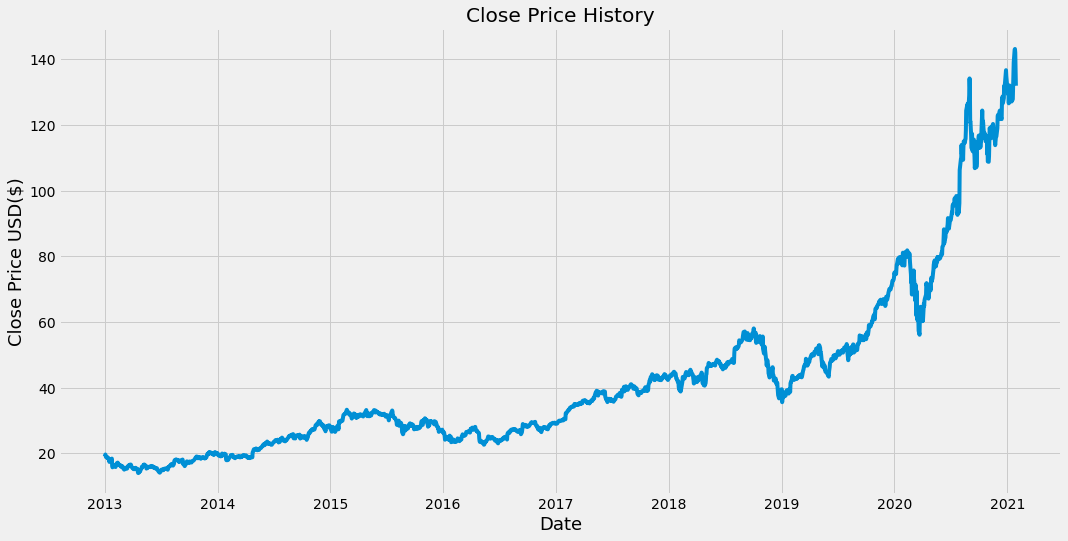

In [39]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [40]:
data = df.filter(['Close'])
#DF to numpy array
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1628

In [41]:
#Scaling the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03914924],
       [0.04380933],
       [0.04189388],
       ...,
       [0.99148684],
       [0.95302307],
       [0.91332111]])

In [42]:
#Creating training dataset
train_data = scaled_data[0:training_data_len, :]
#feature set
x_train = []
#target variable
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if(i<=61):
        print(x_train)
        print(y_train)
        print()

[array([0.03914924, 0.04380933, 0.04189388, 0.03772025, 0.03686341,
       0.03725313, 0.0349839 , 0.03675563, 0.03586838, 0.03074117,
       0.02636576, 0.03194073, 0.03099821, 0.03025747, 0.03157589,
       0.03412982, 0.01657569, 0.01364032, 0.0163905 , 0.0187233 ,
       0.01832529, 0.01795492, 0.01743805, 0.01431474, 0.01860446,
       0.01846902, 0.02147349, 0.02334195, 0.02471012, 0.02138504,
       0.02113904, 0.02102296, 0.01924571, 0.01919871, 0.01611963,
       0.01534846, 0.01666137, 0.01444741, 0.01615279, 0.01493663,
       0.01406045, 0.0110394 , 0.00815932, 0.01122458, 0.00970992,
       0.0110698 , 0.0113849 , 0.01308475, 0.01047554, 0.01045343,
       0.0116005 , 0.01468511, 0.01801849, 0.01767853, 0.01701239,
       0.01719205, 0.01972941, 0.02019099, 0.01951658, 0.01701239])]
[0.014408713082739541]

[array([0.03914924, 0.04380933, 0.04189388, 0.03772025, 0.03686341,
       0.03725313, 0.0349839 , 0.03675563, 0.03586838, 0.03074117,
       0.02636576, 0.03194073, 0.0

In [43]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [44]:
#Reshaping x_train and y_train as they are 2D and LSTM expects 3 dimensions
#LSTM -> [No of Samples, No of time steps, No of features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1568, 60, 1)

In [45]:
#Building the LSTM model
model = Sequential()
#Adding first LSTM Layer and passing 50 neurons to it 
#Also specifiying the shape for the first layer
#return_sequences = Treu to pass on the information to the next layer
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [46]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
#Training the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1568/1568 [==============================] - 19s 11ms/step - loss: 7.0780e-04


In [48]:
#Creating the test dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [49]:
x_test = np.array(x_test)
x_test.shape

(407, 60)

In [50]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(407, 60, 1)

In [51]:
#Get the predicted price values
predictions = model.predict(x_test)
#Inverse transforming the data so as to compare with y_test dataset
predictions = scaler.inverse_transform(predictions)
predictions.shape

(407, 1)

In [52]:
#Getting the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.230345667433681

<ipython-input-53-35c59ee75b87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


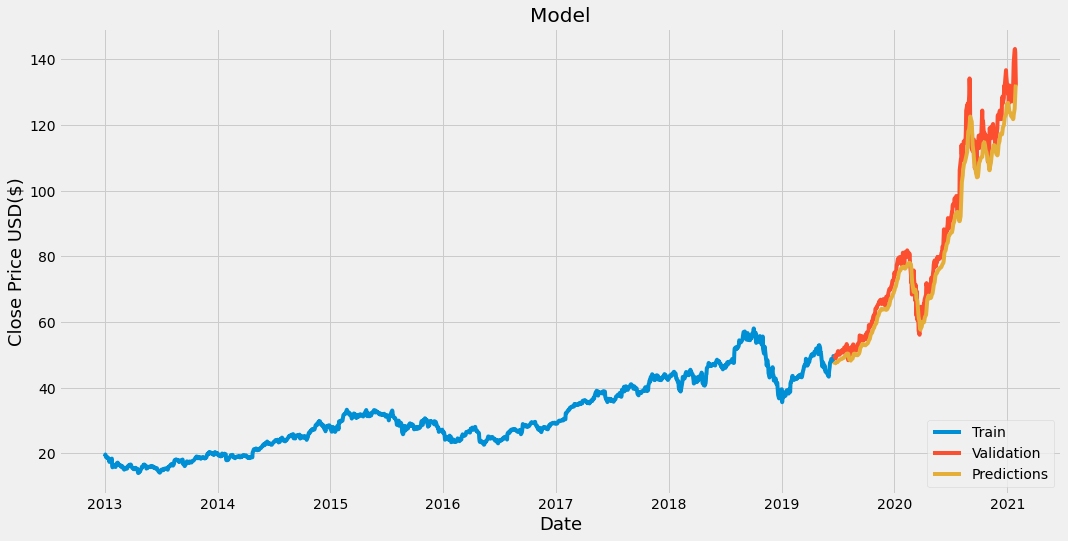

In [53]:
train = data[:training_data_len]
#Validation set
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'lower right')
plt.show()

In [54]:
#Valid and prediction price
valid

,Close,Predictions
Date,,
2019-06-20,49.865002,46.989094
2019-06-21,49.695000,47.245785
2019-06-24,49.645000,47.451324
2019-06-25,48.892502,47.598301
2019-06-26,49.950001,47.609482
...,...,...
2021-01-25,142.919998,124.881485
2021-01-26,143.160004,127.223328
2021-01-27,142.059998,129.590500


In [58]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2013-01-01', end='2021-02-12')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
#Append past 60 days data to X_test
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print('Predicted Price ', pred_price)

Predicted Price  [[127.95063]]


In [61]:
apple_quote_actual = web.DataReader('AAPL', data_source='yahoo', start='2021-02-12', end='2021-02-12')
print('Actual Price ',apple_quote_actual['Close'])

Actual Price  Date
2021-02-11    135.130005
2021-02-11    135.130005
Name: Close, dtype: float64
